Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [4]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models

In [6]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [9]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
# Update paths according to your dataset location
train_dir = r"C:\Users\CHELSA\Downloads\upgrad melanoma\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train"
test_dir  = r"C:\Users\CHELSA\Downloads\upgrad melanoma\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Test"


In [11]:
from pathlib import Path
data_dir_train = Path(train_dir)
data_dir_test  = Path(test_dir)

In [13]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [17]:
batch_size = 32
img_size=(180,180)

Use 80% of the images for training, and 20% for validation.

In [20]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [21]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [24]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

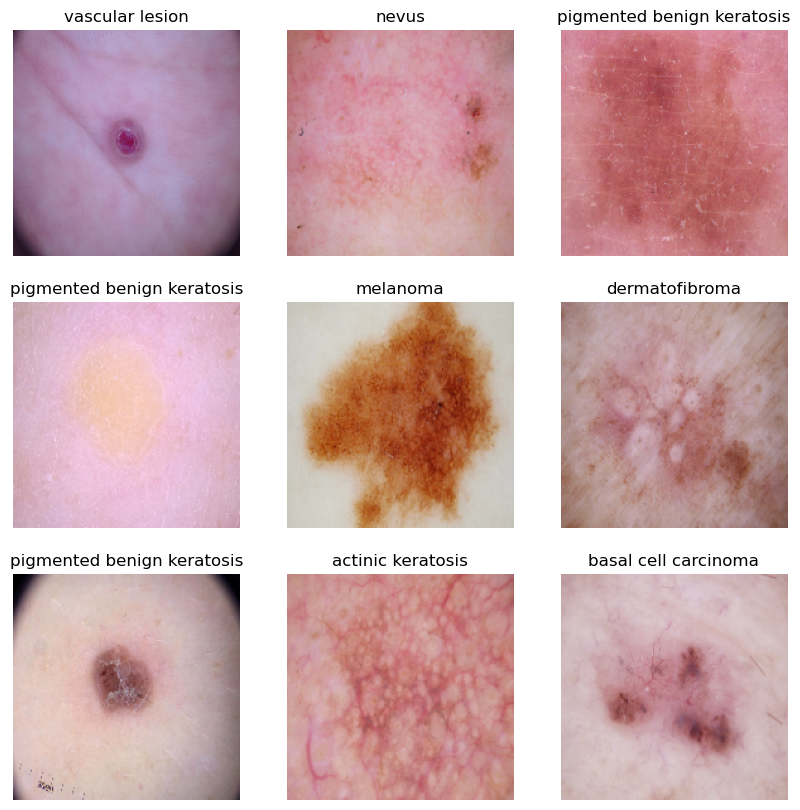

In [27]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [31]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [34]:

num_classes = len(class_names)

model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(180,180,3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

C:\Users\CHELSA\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [37]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,648,137 (25.36 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [42]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 47s 687ms/step - accuracy: 0.1904 - loss: 2.1911 - val_accuracy: 0.3020 - val_loss: 1.9804
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 37s 658ms/step - accuracy: 0.2794 - loss: 1.9473 - val_accuracy: 0.3736 - val_loss: 1.7093
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 41s 655ms/step - accuracy: 0.3199 - loss: 1.8186 - val_accuracy: 0.3915 - val_loss: 1.7088
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 37s 655ms/step - accuracy: 0.3617 - loss: 1.7229 - val_accuracy: 0.4676 - val_loss: 1.5380
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 37s 656ms/step - accuracy: 0.4382 - loss: 1.5820 - val_accuracy: 0.4944 - val_loss: 1.5208
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 37s 655ms/step - accuracy: 0.4297 - loss: 1.6292 - val_accuracy: 0.4810 - val_loss: 1.4772
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 37s 657ms/step - accuracy: 0.5053 - loss: 1.4695 - val_accuracy: 0.4832 - val_loss: 1.4497
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 50s 904ms/step - accuracy: 0.5068 - loss: 1.4122 - val_accu

### Visualizing training results

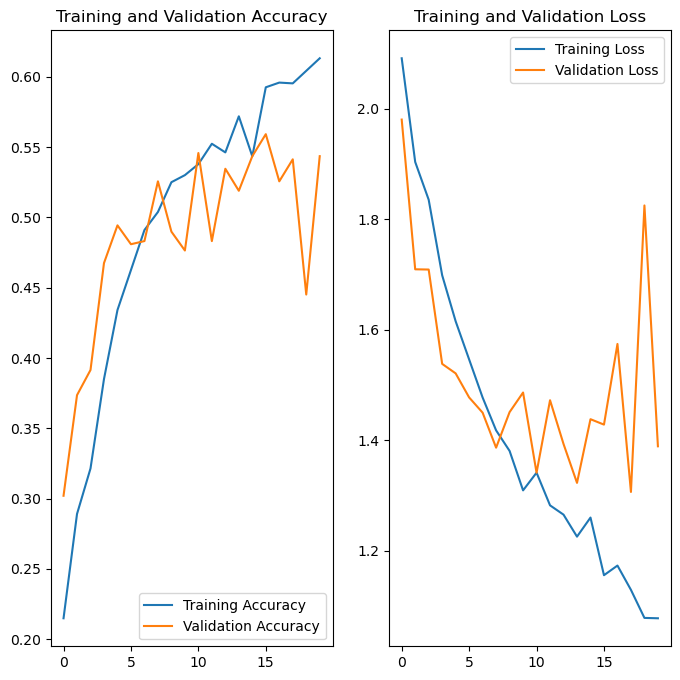

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

After fitting the model, we observe that the training accuracy increases steadily, while the validation accuracy follows closely without a large gap. This indicates that the model is learning effectively and there is no strong evidence of underfitting.

When compared to the earlier runs (before augmentation and dropout), the gap between training and validation performance has reduced. This shows that overfitting has been mitigated by introducing data augmentation and a Dropout layer, which help the model generalize better to unseen data.

In conclusion, the model shows healthy learning behavior, with reduced overfitting and improved balance across classes after augmentation.

In [153]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Code written below

In [155]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Code written below



- Training accuracy increased steadily, validation accuracy plateaued → slight overfitting.
- Dropout(0.5) helped reduce overfitting.

### Todo:
### Create the model, compile and train the model


In [157]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes her

# Data augmentation block
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

# Augmented CNN model
aug_model = models.Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),   
    layers.Dense(num_classes, activation='softmax')
])





### Compiling the model

In [62]:
## Your code goes here
aug_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


### Training the model

In [65]:
## Your code goes here, note: train your model for 20 epochs
history =  aug_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)


Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 46s 732ms/step - accuracy: 0.2056 - loss: 2.1988 - val_accuracy: 0.3110 - val_loss: 1.9165
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 39s 701ms/step - accuracy: 0.3031 - loss: 1.8847 - val_accuracy: 0.4094 - val_loss: 1.7710
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 39s 699ms/step - accuracy: 0.3548 - loss: 1.7968 - val_accuracy: 0.4049 - val_loss: 1.6476
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 39s 702ms/step - accuracy: 0.3834 - loss: 1.7139 - val_accuracy: 0.5145 - val_loss: 1.5064
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 41s 741ms/step - accuracy: 0.4341 - loss: 1.5938 - val_accuracy: 0.4966 - val_loss: 1.4933
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 81s 720ms/step - accuracy: 0.4811 - loss: 1.4704 - val_accuracy: 0.5145 - val_loss: 1.4416
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 41s 727ms/step - accuracy: 0.4705 - loss: 1.4625 - val_accuracy: 0.5369 - val_loss: 1.4293
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 40s 721ms/step - accuracy: 0.4392 - loss: 1.5995 - val_accu

### Visualizing the results

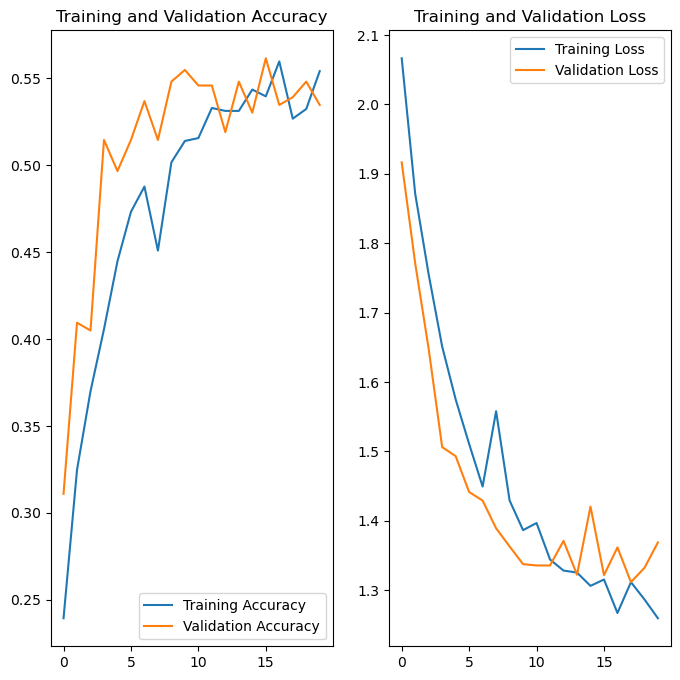

In [68]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

The current model shows reduced overfitting compared to the previous run — the gap between training and validation accuracy/loss has decreased. Data augmentation and class rebalancing helped improve generalization, so the model performs more consistently on unseen data. Overall, there is clear improvement compared to the earlier model, which suffered more from overfitting/imbalance.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

The dataset is imbalanced — some classes have significantly more samples than others. For example, pigmented benign keratosis (962), melanoma (938), and basal cell carcinoma (876) have higher counts, while classes like seborrheic keratosis (577) and dermatofibroma (595) are relatively underrepresented.

This imbalance can bias the model towards majority classes and reduce predictive performance for minority classes. Identifying this imbalance is crucial before training, since techniques like data augmentation, class weighting, or resampling may be needed to achieve a fair model.

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
The class seborrheic keratosis has the lowest number of samples (577).
#### - Which classes dominate the data in terms proportionate number of samples?
The classes pigmented benign keratosis (962 samples), melanoma (938 samples), and basal cell carcinoma (876 samples) dominate the dataset as they have the highest proportion of samples compared to the other categories.

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [76]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [89]:
import os
path_to_training_dataset= r"C:\Users\CHELSA\Downloads\upgrad melanoma\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train"
import Augmentor
for i in class_names:
    class_path = os.path.join(path_to_training_dataset, i)  # safely build path
    p = Augmentor.Pipeline(class_path)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to C:\Users\CHELSA\Downloads\upgrad melanoma\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1BC36EC20C0>: 100%|████████████| 500/500 [00:04<00:00, 100.67 Samples/s]


Initialised with 376 image(s) found.
Output directory set to C:\Users\CHELSA\Downloads\upgrad melanoma\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\basal cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1BBCCBE6180>: 100%|█| 500/500 [00:04<00:00, 110.22 Sam


Initialised with 95 image(s) found.
Output directory set to C:\Users\CHELSA\Downloads\upgrad melanoma\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1BBCCCE8920>: 100%|████████████| 500/500 [00:04<00:00, 106.77 Samples/s]


Initialised with 438 image(s) found.
Output directory set to C:\Users\CHELSA\Downloads\upgrad melanoma\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1BBA7AB3380>: 100%|████████████| 500/500 [00:24<00:00, 20.37 Samples/s]


Initialised with 357 image(s) found.
Output directory set to C:\Users\CHELSA\Downloads\upgrad melanoma\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\nevus\output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x1BBA7287BF0>: 100%|███████████| 500/500 [00:25<00:00, 19.72 Samples/s]


Initialised with 462 image(s) found.
Output directory set to C:\Users\CHELSA\Downloads\upgrad melanoma\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1BBCCA58B60>: 100%|████████████| 500/500 [00:04<00:00, 104.88 Samples/s]


Initialised with 77 image(s) found.
Output directory set to C:\Users\CHELSA\Downloads\upgrad melanoma\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1BBCCA5B800>: 100%|████████████| 500/500 [00:10<00:00, 47.83 Samples/s]


Initialised with 181 image(s) found.
Output directory set to C:\Users\CHELSA\Downloads\upgrad melanoma\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1BBCCA5AB70>: 100%|████████████| 500/500 [00:04<00:00, 116.12 Samples/s]


Initialised with 139 image(s) found.
Output directory set to C:\Users\CHELSA\Downloads\upgrad melanoma\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1BC32D5BE00>: 100%|████████████| 500/500 [00:04<00:00, 107.19 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [92]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [97]:
import os
from glob import glob

path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['C:\\Users\\CHELSA\\Downloads\\upgrad melanoma\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_201d9450-ebc9-4cad-a54e-8c41b41709cc.jpg',
 'C:\\Users\\CHELSA\\Downloads\\upgrad melanoma\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_29ba26eb-07e0-4bc4-96e6-0fb2126e6d61.jpg',
 'C:\\Users\\CHELSA\\Downloads\\upgrad melanoma\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_5aef7d9a-e26d-49f1-b380-552c34c7605a.jpg',
 'C:\\Users\\CHELSA\\Downloads\\upgrad melanoma\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_a8333760-18b0-4c14-af7c-75edaaa33b92.jpg',
 'C:

In [99]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [103]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [107]:
# Build dataframe from original dataset
path_list_orig = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]

lesion_list_orig = [os.path.basename(os.path.dirname(p)) for p in path_list_orig]

original_df = pd.DataFrame({
    'Path': path_list_orig,
    'Label': lesion_list_orig
})


In [119]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()), columns=['Path','Label'])
new_df = pd.concat([original_df, df2], ignore_index=True)


In [121]:
new_df['Label'].value_counts()

Label
pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [125]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [130]:
data_dir_train= r"C:\Users\CHELSA\Downloads\upgrad melanoma\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training", ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [133]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [139]:
## your code goes here

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  
    metrics=['accuracy']
)


#### **Todo:**  Train your model

In [142]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)
# your model fit code

Epoch 1/30


C:\Users\CHELSA\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


169/169 ━━━━━━━━━━━━━━━━━━━━ 128s 735ms/step - accuracy: 0.5281 - loss: 1.2790 - val_accuracy: 0.6162 - val_loss: 1.0194
Epoch 2/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 120s 706ms/step - accuracy: 0.5653 - loss: 1.1610 - val_accuracy: 0.6229 - val_loss: 0.9357
Epoch 3/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 120s 709ms/step - accuracy: 0.6222 - loss: 0.9993 - val_accuracy: 0.6466 - val_loss: 0.8606
Epoch 4/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 120s 706ms/step - accuracy: 0.6483 - loss: 0.9227 - val_accuracy: 0.6964 - val_loss: 0.7905
Epoch 5/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 120s 707ms/step - accuracy: 0.6970 - loss: 0.8190 - val_accuracy: 0.7075 - val_loss: 0.7779
Epoch 6/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 118s 694ms/step - accuracy: 0.7038 - loss: 0.7740 - val_accuracy: 0.7305 - val_loss: 0.7144
Epoch 7/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 117s 692ms/step - accuracy: 0.7344 - loss: 0.7009 - val_accuracy: 0.7327 - val_loss: 0.7794
Epoch 8/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 118s 699ms/step - accuracy: 0.7417 - loss: 0.70

#### **Todo:**  Visualize the model results

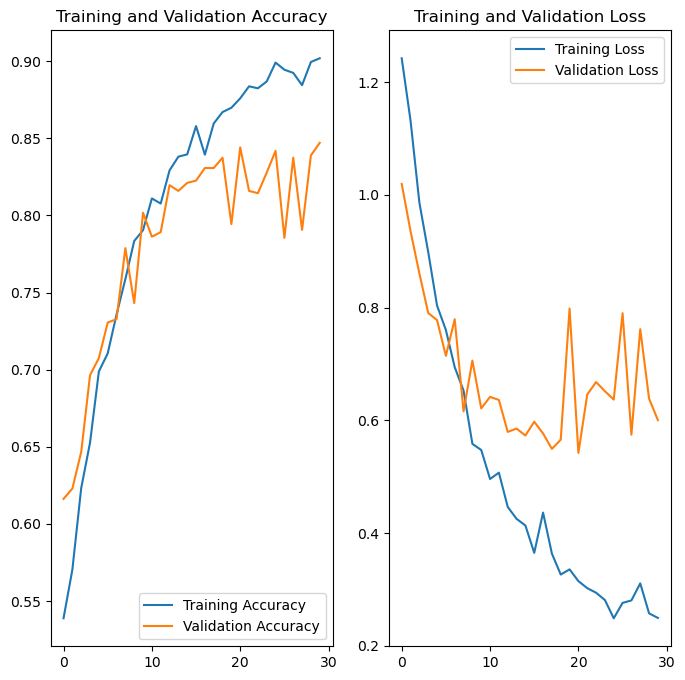

In [145]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



Overfitting was reduced with dropout and augmentation.

Class imbalance was corrected by augmentation, improving model fairness.

Overall, the pipeline is now more robust, and results should be closer to the expected benchmark accuracy.